# **DNAshapeR**

**R package for high-throughput DNA shape predictions and feature encoding**  
Tsu-Pei Chiu, Federico Comoglio, Tianyin Zhou, Lin Yang, Renato Paro, and Remo Rohs

## Introduction

DNAshapeR predicts DNA shape features in an ultra-fast, high-throughput manner from genomic sequencing data. The package takes either nucleotide sequence or genomic intervals as input, and generates various graphical representations for further analysis. DNAshapeR further encodes DNA sequence and shape features for statistical learning applications by concatenating feature matrices with user-defined combinations of k-mer and DNA shape features that can be readily used as input for machine learning algorithms.

In this notebook, you will learn:

* how to load/install DNAshapeR

* how to predict DNA shape features

* how to visualize DNA shape predictions

* how to encode sequence and shape features, and apply them

## Installation

In [0]:
# Takes about 4 minutes
library(devtools, quietly = TRUE)
install_github(repo = "mateuszrezler/DNAshapeR", quiet = TRUE)
library(DNAshapeR, quietly = TRUE)

Installing 15 packages: GenomicRanges, Biostrings, fields, BiocGenerics, S4Vectors, IRanges, RCurl, GenomeInfoDbData, bitops, zlibbioc, dotCall64, GenomeInfoDb, XVector, spam, maps


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



A

## Description of usage

### Predict DNA shape features

The core of DNAshapeR, the DNAshape method (Zhou, et al., 2013), uses a sliding pentamer window where structural features unique to each of the 512 distinct pentamers define a vector of minor groove width (MGW), Roll, propeller twist (ProT), and helix twist (HelT) at each nucleotide position. MGW and ProT define base-pair parameters whereas Roll and HelT represent base pair-step parameters. The values for each DNA shape feature as function of its pentamer sequence were derived from all-atom Monte Carlo simulations where DNA structure is sampled in collective and internal degrees of freedom in combination with explicit sodium counter ions (Zhang, et al., 2014). The Monte Carlo simulations were analyzed with a modified Curves approach (Zhou, et al., 2013). Average values of each shape feature for each pentamer were derived from analyzing the ensemble of Monte Carlo predictions for 2,121 DNA fragments of 12−27 base pairs in length. DNAshapeR predicts the four DNA shape features MGW, HelT, ProT, and Roll, which were observed in various cocrystal structures as playing an important role in specific protein-DNA binding.

In the latest version, we further added additional 9 DNA shape features beyond our previous set of 4 features, and expanded our available repertoire to a total of 13 features, including 6 inter-base pair or base pair-step parameters (HelT, Rise, Roll, Shift, Slide, and Tilt), 
6 intra-base pair or base pair-step parameters (Buckle, Opening, ProT, Shear, Stagger, and Stretch), and MGW.

### Predict biophysical feature

Our previous work explained protein-DNA binding specificity based on correlations between MGW and (electrostatic potential) EP observed in experimentally available structures (Joshi, et al., 2007). However, A/T and C/G base pairs carry different partial charge distributions in the 
minor groove (due primarily to the guanine amino group), which will affect minor-groove EP. We developed a high-throughput method, named DNAphi, to predict minor-groove EP based on data mining of results from solving the nonlinear Poisson-Boltzmann calculations (Honig & Nicholls, 1995) on 2,297 DNA structures derived from Monte Carlo simulations. DNAshapeR includes EP as an additional feature.

### Predict DNA shape feature due to CpG methylation

To achieve a better mechanistic understanding of the effect of CpG methylation on local DNA structure, we developed a high-throughput method, named methyl-DNAshape, for predicting the impact of cytosine methylation on DNA shape features. In analogy to the DNAshape method (Zhou, et al., 2013), the method predicts DNA shape features (ProT, HelT, Roll, and MGW) in the context of CpG methylation based on methyl-DNAshape Pentamer Query Table (mPQT) derived from the results of all-atom Monte Carlo simulations on a total of 3,518 DNA fragments of lengths varying from 13 to 24 bp.

## Examples of usage

### Predictions

DNAshapeR can predict DNA shape features from custom FASTA files or directly from genomic coordinates in the form of a GRanges object within Bioconductor (see <https://bioconductor.org/packages/release/bioc/html/GenomicRanges.html> for more information).

List of built-in sample files:

In [0]:
ext_data <- system.file("extdata", package = "DNAshapeR")
dir(ext_data)

[1] "CGRsample_short.fa"     "CGRsample.fa"           "MethylSample.fa"       
 [4] "MethylSamplePos.fa"     "PBMsample_short.fa"     "PBMsample_short.s"     
 [7] "PBMsample.fa"           "PBMsample.s"            "SELEXsample_short.fa"  
[10] "SELEXsample_short.s"    "SELEXsample.fa"         "SELEXsample.s"         
[13] "SingleSeqsample.fa"     "SingleSeqsample.fa.MGW"

#### From FASTA file

To predict DNA shape features from a FASTA file

In [0]:
file_cgr <- system.file("extdata", "CGRsample.fa", package = "DNAshapeR")
pred_cgr <- getShape(file_cgr)

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 2000

Record length: 1999

Record length: 2000

Record length: 1999

Record length: 2000

Done



##### Preview of the files

Head of the input file

In [0]:
system(paste("head -n 2", file_cgr), intern = TRUE)

[1] ">seq1"                                                                           
[2] "AAGCGTAAGATCCGATTTTTCCAGTTTGAGGAATAGAATTAATACTAGCTTGGTGAATAATACCATCGCGATCGCGTTGA"

List of generated files

In [0]:
dir(path = ext_data, pattern = "CGRsample.fa.")

[1] "CGRsample.fa.EP"   "CGRsample.fa.HelT" "CGRsample.fa.MGW" 
[4] "CGRsample.fa.ProT" "CGRsample.fa.Roll"

Head of selected output file

In [0]:
file_cgr_ep <- paste(file_cgr, ".EP", sep="")
system(paste("head -n 2", file_cgr_ep), intern = TRUE)

[1] ">seq1"                                                                                                                                                                          
[2] "NA,NA,-5.65,-5.17,-5.03,-6.77,-7.23,-7.75,-6.56,-8.19,-7.65,-5.43,-5.10,-5.15,-7.97,-8.76,-10.80,-10.10,-9.65,-8.22,-5.75,-5.28,-6.86,-5.90,-9.29,-8.27,-7.57,-5.39,-6.99,-5.52"

#### From genomic intervals (e.g. TFs binding sites, CpG islands, replication origins, ...)

To predict DNA shape from genomic intervals stored as GRanges object, a reference genome is required. Several reference genomes are available within BioConductor as BSgenome objects (see <http://bioconductor.org/packages/release/bioc/html/BSgenome.html> for more information). For example, the sacCer3 release of the *S.Cerevisiae* genome can be retrieved.

In [0]:
# Takes about 6 minutes
# Install Bioconductor packages
install.packages("BiocManager", quiet = TRUE)
BiocManager::install(c("BSgenome.Scerevisiae.UCSC.sacCer3"), quiet = TRUE)
library(BSgenome.Scerevisiae.UCSC.sacCer3, quietly = TRUE)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'BiocVersion', 'BSgenome.Scerevisiae.UCSC.sacCer3'

also installing the dependencies ‘matrixStats’, ‘formatR’, ‘Biobase’, ‘DelayedArray’, ‘lambda.r’, ‘futile.options’, ‘SummarizedExperiment’, ‘futile.logger’, ‘snow’, ‘XML’, ‘GenomicAlignments’, ‘BiocParallel’, ‘Rhtslib’, ‘rtracklayer’, ‘Rsamtools’, ‘BSgenome’


Old packages: 'DNAshapeR', 'curl', 'farver', 'pillar', 'pkgbuild', 'processx',
  'ps', 'rex', 'rprojroot', 'tidyr'


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit




Given a reference genome, the `getFasta` function first extracts the DNA sequences based on the provided genomic coordinates, and then performs shape predictions within a user-defined window (of size equal to width, 100 bp in the example below) computed from the center of each genomic interval:

In [0]:
# Create a query GRanges object
gr <- GRanges(seqnames = c("chrI"),
              strand = c("+", "-", "+"),
              ranges = IRanges(start = c(100, 200, 300), width = 100))
getFasta(gr, Scerevisiae, width = 100, filename = "SCer.fa")
file_scer <- "SCer.fa"
pred_scer <- getShape(file_scer)

Removed sequences #: integer(0)



Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 100

Record length: 99

Record length: 100

Record length: 99

Record length: 100

Done



##### Preview of the files

Head of the input file (with extracted sequences)

In [0]:
system(paste("head -n 2", file_scer), intern = TRUE)

[1] ">seq1"                                                                           
[2] "GGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCATTCAACCATACCACTCCGAA"

List of generated files

In [0]:
dir(pattern = "SCer.fa.")

[1] "SCer.fa.EP"   "SCer.fa.HelT" "SCer.fa.MGW"  "SCer.fa.ProT" "SCer.fa.Roll"

Head of selected output file

In [0]:
file_scer_helt <- paste(file_scer, ".HelT", sep="")
system(paste("head -n 2", file_scer_helt), intern = TRUE)

[1] ">seq1"                                                                                                                                                                           
[2] "NA,37.04,33.11,34.58,31.83,35.72,35.34,31.36,34.70,34.30,36.33,31.73,35.72,31.58,34.87,34.67,34.84,36.27,33.32,35.02,34.49,34.55,34.38,34.02,31.38,35.69,33.77,34.66,32.26,35.48"

#### From public domain projects

The genomic intervals can also be obtained from public domain projects, including ENCODE, NCBI, Ensembl, etc. The AnnotationHub package (see <http://bioconductor.org/packages/release/bioc/html/AnnotationHub.html> for more information) provides an interface to retrieve genomic intervals from these multiple online project resources.

In [0]:
# Takes about 7 minutes
# Install Bioconductor packages
BiocManager::install(c("AnnotationHub", "BSgenome.Hsapiens.UCSC.hg19"),
                     quiet = TRUE)
library(AnnotationHub, quietly = TRUE)
library(BSgenome.Hsapiens.UCSC.hg19, quietly = TRUE)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'AnnotationHub', 'BSgenome.Hsapiens.UCSC.hg19'

also installing the dependencies ‘bit’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘bit64’, ‘blob’, ‘shiny’, ‘BiocFileCache’, ‘RSQLite’, ‘rappdirs’, ‘AnnotationDbi’, ‘interactiveDisplayBase’


Old packages: 'DNAshapeR', 'curl', 'farver', 'pillar', 'pkgbuild', 'processx',
  'ps', 'rex', 'rprojroot', 'tidyr'



The genomic intervals of interest can be selected progressively through the functions of `subset` and `query` with keywords, and can be subjected as an input of GRanges object to `getFasta` function.

In [0]:
# Takes about 5 minutes
ah <- AnnotationHub()
ah <- subset(ah, species == "Homo sapiens")
ah <- query(ah, c("H3K4me3", "Gm12878", "Roadmap"))
getFasta(ah[[1]], Hsapiens, width = 150, filename = "HSap.fa")
file_hsap <- "HSap.fa"
pred_hsap <- getShape(file_hsap)

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

snapshotDate(): 2019-10-29

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

downloading 1 resources

retrieving 1 resource

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

loading from cache

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

Using temporary cache /tmp/Rtmp0Iv1WS/BiocFileCache

Removed sequences #: integer(0)



Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 150

Record length: 149

Record length: 150

Record length: 149

Record length: 150

Done



##### Preview of the files

Head of the input file (with extracted sequences)

In [0]:
system(paste("head -n 2", file_hsap), intern = TRUE)

[1] ">seq1"                                                                           
[2] "GCCCCCGCCCCAACCACCACCCCCCCGCCGGCCCCCCCCCCGCCCCGCCCGCCCCCCCCCCCGCCCGCCCCCCCCCCGCC"

List of generated files

In [0]:
dir(pattern = "HSap.fa.")

[1] "HSap.fa.EP"   "HSap.fa.HelT" "HSap.fa.MGW"  "HSap.fa.ProT" "HSap.fa.Roll"

Head of selected output file

In [0]:
file_hsap_mgw <- paste(file_hsap, ".MGW", sep="")
system(paste("head -n 2", file_hsap_mgw), intern = TRUE)

[1] ">seq1"                                                                                                                                            
[2] "NA,NA,4.82,4.75,4.94,5.30,5.29,4.96,4.82,4.89,5.44,5.42,4.82,4.33,5.38,5.56,4.84,5.38,5.56,4.77,4.58,4.75,4.75,4.75,4.94,5.30,5.29,5.09,5.36,5.36"

#### From FASTA file with methylated DNA sequence

To predict DNA shape features in the context of CpG methylation, one can prepare a FASTA file of sequence with symbol ‘Mg’: ‘M’ referring to cytosine of methylated CpG on the leading strand and ‘g’ referring the cytosine of methylated CpG on lagging strand. For example,
```
>seq1
GTGTCACMgCGTCTATACG
```
notifying the cytosine at position 8<sup>th</sup> on the leading strand and the one at position 9<sup>th</sup> on the lagging strand are methylated.

In [0]:
file_methyl <- system.file("extdata", "MethylSample.fa", package = "DNAshapeR")
pred_methyl <- getShape(file_methyl, methylate = TRUE)

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 19

Record length: 18

Record length: 19

Record length: 18

Done



##### Preview of the files

Head of the input file

In [0]:
system(paste("head -n 2", file_methyl), intern = TRUE)

[1] ">seq1"               "GTGTCACMgCGTCTATACG"

List of generated files

In [0]:
dir(path = ext_data, pattern = "MethylSample_methylated.fa.")

[1] "MethylSample_methylated.fa.HelT" "MethylSample_methylated.fa.MGW" 
[3] "MethylSample_methylated.fa.ProT" "MethylSample_methylated.fa.Roll"

Head of selected output file

In [0]:
file_methyl_prot <- paste(ext_data, "/MethylSample_methylated.fa.ProT", sep="")
system(paste("head -n 2", file_methyl_prot), intern = TRUE)

[1] ">seq1"                                                                                                
[2] "NA,NA,-7.25,-8.28,-6.82,-7.36,-4.35,-9.67,-8.89,-4.10,-7.43,-8.81,-3.62,-7.03,-7.69,-7.88,-9.05,NA,NA"

#### From FASTA and methylated position files

To predict DNA shape features in the context of CpG methylation, in addition to providing regular FASTA file (without symbolizing ‘Mg’) one can provide an additional input file identifying methylated positions. For example,
```
>seq1
4,16
```
notifying the cytosine at position 4<sup>th</sup> and 16<sup>th</sup> on leading strand, and 5<sup>th</sup> and 17<sup>th</sup> on lagging strand are methylated.

In [0]:
file_single <- system.file("extdata", "SingleSeqsample.fa",
                           package = "DNAshapeR")
file_pos <- system.file("extdata", "MethylSamplePos.fa",
                        package = "DNAshapeR")
pred_pos <- getShape(file_single, methylate = TRUE,
                     methylatedPosFile = file_pos)

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 24

Record length: 23

Record length: 24

Record length: 23

Done



##### Preview of the files

Head of the main input file

In [0]:
system(paste("head -n 2", file_single), intern = TRUE)

[1] ">seq1"                    "AAGCGTAAGATCAAGCGTAAGATC"

Head of the additional input file

In [0]:
system(paste("head -n 2", file_pos), intern = TRUE)

[1] ">seq1" "4,16"

List of generated files

In [0]:
dir(path = ext_data, pattern = "SingleSeqsample_methylated.fa.")

[1] "SingleSeqsample_methylated.fa.HelT" "SingleSeqsample_methylated.fa.MGW" 
[3] "SingleSeqsample_methylated.fa.ProT" "SingleSeqsample_methylated.fa.Roll"

Head of selected output file

In [0]:
file_pos_roll <- paste(ext_data, "/SingleSeqsample_methylated.fa.Roll", sep="")
system(paste("head -n 2", file_pos_roll), intern = TRUE)

[1] ">seq1"                                                                                                                         
[2] "NA,-2.03,-4.84,9.38,-4.05,5.68,-2.82,-3.23,-2.49,-5.10,-0.67,6.06,-2.98,-1.80,-4.84,9.38,-4.05,5.68,-2.82,-3.23,-2.49,-5.53,NA"

### Visualize DNA shape prediction

DNAshapeR can be used to generate various graphical representations for further analyses. The prediction result can be visualized in the form of scatter plots (Comoglio, et al., 2015), heat maps (Yang, et al., 2014), or genome browser tracks (Chiu, et al., 2015).

#### Ensemble representation: metashape plot

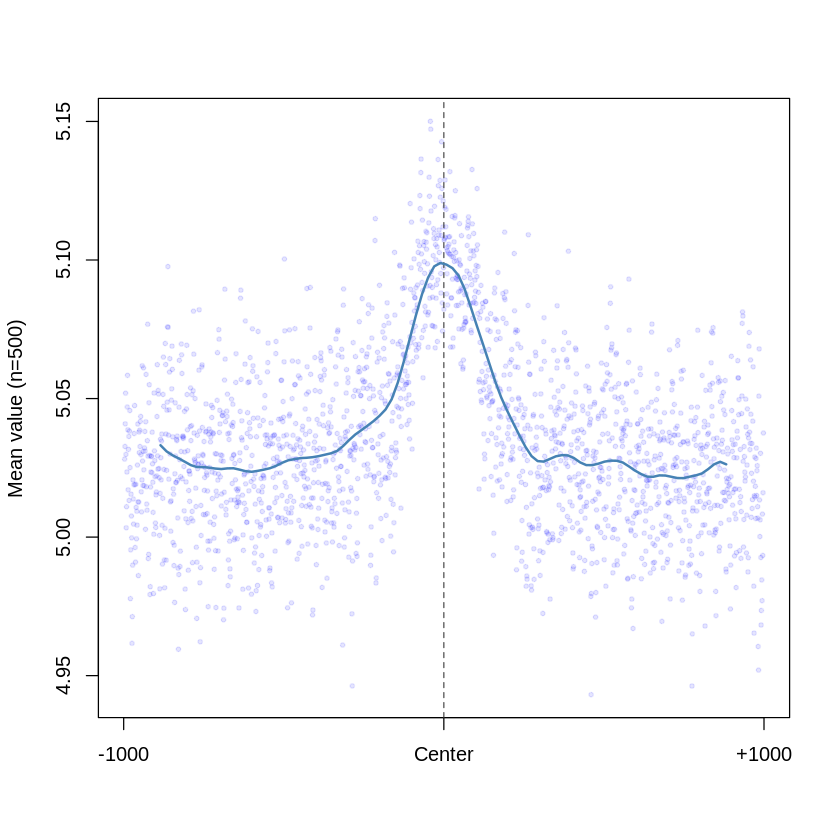

In [0]:
plotShape(pred_cgr$MGW)

#### Ensemble representation: heat map

The prediction result can be visualized in the heatmap of DNA shape features.

In [0]:
library(fields, quietly = TRUE)

Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:AnnotationHub’:

    display


The following object is masked from ‘package:stats4’:

    mle


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 



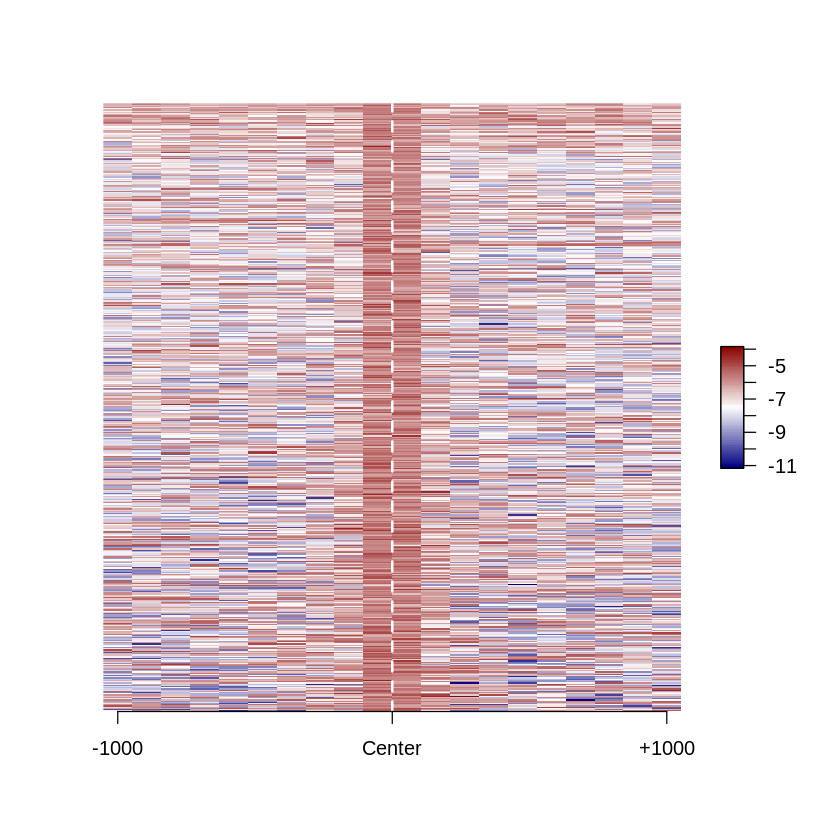

In [0]:
heatShape(pred_cgr$ProT, 20)

#### Individual representation: genome browser-like tracks

The prediction result can be visualized in the form of genome browser tracks.

*Note that the input data should only contain one sequence.

In [0]:
pred_single <- getShape(file_single)

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 24

Record length: 23

Record length: 24

Record length: 23

Record length: 24

Done



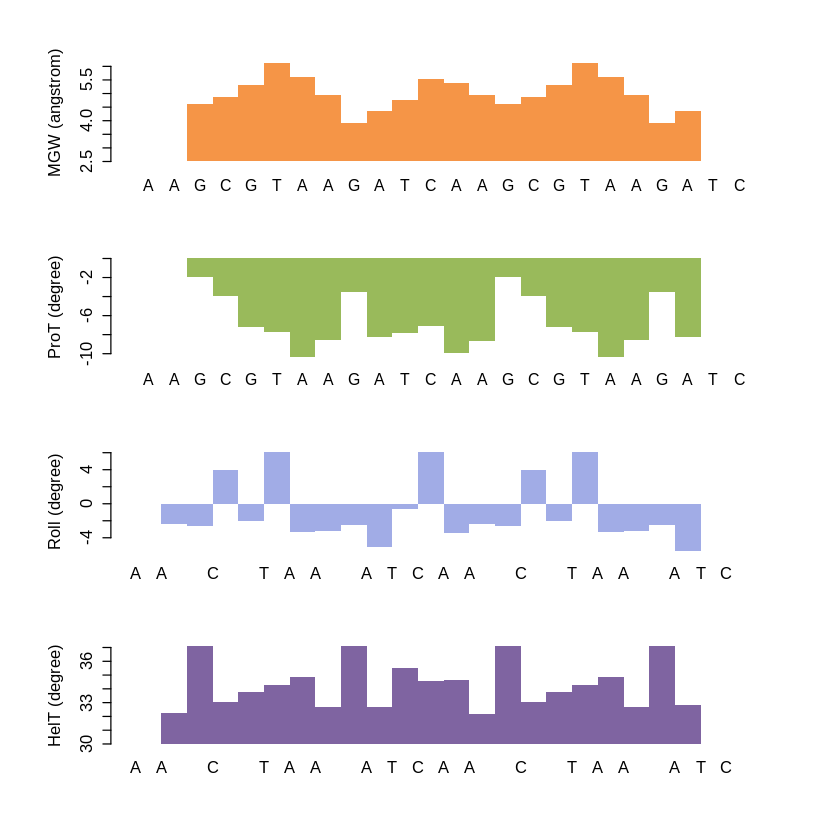

In [0]:
trackShape(file_single, pred_single)

### Encode sequence and shape features

DNAshapeR can be used to generate feature vectors for a user-defined model. These models can consist of either sequence features (1-mer, 2-mer, 3-mer), shape features (MGW, HelT, Rise, Roll, Shift, Slide, Tilt, Buckle, Opening, ProT, Shear, Stagger, Stretchand EP), or any combination of those two. For 1-mer features, sequence is encoded in form of four binary numbers (i.e., in terms of 1-mers, 1000 for adenine, 0100 for cytosine, 0010 for guanine, and 0001 for thymine) at each nucleotide position (Zhou, et al., 2015). The encoding function of the DNAshapeR package enables the determination of higher order sequence features, for example, 2-mers and 3-mers (16 and 64 binary features at each position, respectively).

The user can also choose to include second order shape features in the generated feature vector. The second order shape features are product terms of values for the same category of shape features (MGW, HelT, Rise, Roll, Shift, Slide, Tilt, Buckle, Opening, ProT, Shear, Stagger, Stretch or EP) at adjacent positions. They were introduced to encode the tendency of, for instance, a narrow minor groove region exhibiting an enhanced narrowing if adjacent positions are also characterized by a narrow groove (Zhou, et al., 2015). The feature encoding function of DNAshapeR enables the generation of any subset of these features, either only a selected shape category or first order shape features, and any combination with shape or sequence features. The result of feature encoding for each sequence is a chimera feature vector.

#### Encoding process

A feature type vector should be defined before encoding. The vector can be any combination of characters of “k-mer”, “n-shape”, “n-MGW”, “n-ProT”, “n-Roll”, “n-HelT”, “n-Rise”, “n-Shift”, “n-Slide”, “n-Tilt”, “n-Buckle”, “n-Opening”, “n-Shear”, “n-Stagger”, “n-Stretch”, “n-EP” (k, n are integers) where “1-shape” refers to first order and “2-shape” to second order shape features. Notice that n-shape represents the default 4 shape features (MGW, ProT, Roll and HelT).

In [0]:
library(Biostrings, quietly = TRUE)
file_pbm <- system.file("extdata", "PBMsample_short.fa", package = "DNAshapeR")
pred_pbm <- getShape(file_pbm)
featureType <- c("1-mer", "1-shape")
featureVector <- encodeSeqShape(file_pbm, pred_pbm, featureType)
head(featureVector, 2)

Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......
Reading the input sequence......


Parsing files......

Record length: 36

Record length: 35

Record length: 36

Record length: 35

Record length: 36

Done



seq1,0,0,1,0,0,0,1,0,0,0,⋯,0.6272855,0.49789030,0.6497890,0.5007032,0.04500703,0.8241913,0.4852321,0.5583685,0.3066104,0.55836850
seq2,0,1,0,0,0,0,1,0,0,0,⋯,0.5879044,0.04922644,0.8241913,0.4852321,0.55836850,0.3094233,0.5991561,0.6990155,0.4810127,0.03797468


#### Showcase of statistical machine learning application

Feature encoding of multiple sequences thus results in a feature matrix, which can be used as input for variety of statistical machine learning methods. For example, an application is the quantitative modeling of PBM derived protein-DNA binding by linear regression as demonstrated below.

First, pre-computed binding affinity values are combined with experimental information in a data frame structure.

In [0]:
file_exp <- system.file("extdata", "PBMsample_short.s", package = "DNAshapeR")
experimentalData <- read.table(file_exp)
df <- data.frame(affinity=experimentalData$V1, featureVector)

Then, a machine learning package (which can be any learning tools) is used to train a multiple linear regression (MLR) model based on 3-fold cross-validation. In this example, we used the caret package 
(see <http://caret.r-forge.r-project.org/> for more information).

In [0]:
# Takes about 3 minutes
# Install caret package
install.packages("caret", quiet = TRUE)
library(caret, quietly = TRUE)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’




In [0]:
tc <- trainControl(method = "cv", number = 3, savePredictions = TRUE)
model <- train(affinity~ ., data = df, trControl=tc, method="lm",
               preProcess=NULL)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


In [0]:
summary(model)$r.squared

[1] 0.9800845

## References

Chiu, T.-P., et al. GBshape: a genome browser database for DNA shape annotations. Nucleic Acids Res. 2015;43:D103-109.

Comoglio, F., et al. High-resolution profiling of Drosophila replication start sites reveals a DNA shape and chromatin signature of metazoan origins. Cell Rep. 2015;11(5):821-834.

Honig, B. and Nicholls, A. Classical electrostatics in biology and chemistry. Science, 1995;268:1144-1149.

Joshi, R., et al. Functional specificity of a Hoxprotein mediated by the recognition of minor groove structure. Cell, 2007;131:530-543.

Yang, L., et al. TFBSshape: a motif database for DNA shape features of transcriptionfactor binding sites. Nucleic Acids Res. 2014;42:D148-155.

Zhang, X., et al. Conformations of p53 response elements in solution deduced using site-directed spin labeling and Monte Carlo sampling. Nucleic Acids Res. 2014;42(4):2789-2797.

Zhou, T., et al. Quantitative modeling of transcription factor binding specificities using DNA shape. Proc. Natl.Acad. Sci. U S A 2015;112(15):4654-4659.

Zhou, T., et al. DNAshape: a method for the high-throughput prediction of DNA structural features on a genomic scale. Nucleic Acids Res. 2013;41:W56-62.